# Avaliação 05 ENGC63 - Processamento Digital de Sinais

## Primeira Questão
Considere o diagrama de blocos a seguir. O objetivo desse sistema total é processar um sinal analógico no ambiente digital. Considerando que $x_c(t)$ é ilimitado em banda projete cada bloco do sistema indicando espectros e respostas em frequência dos filtros que compõem cada bloco e o espectro do sinal de saída $\hat{y}r(t)$, esse último em função de todos os espectros que você considerar. Para isto, fique livre para propor, quando necessário, uma determinada resposta em frequência (ex.: para o sistema de tempo discreto - $H(e^{jω}))$. Lembre-se que você deve fazer considerações para que o sistema analógico total seja um SLIT.

<img src="sistema.png"/>

In [50]:
# Bibliotecas que irão ser utilizadas para a atividade
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
import math

Vamos começar criando o bloco do filtro antialiasing, que pode ser definido como um filtro passa-baixa, utilizado exatamente para limitar o sinal de entrada em banda, para que possamos depois passar o sinal para o tempo discreto.
A definição da frequência de corte vai influênciar diretamente na taxa miníma de amostragem que precisaremos utilizar na conversão analógico para digital.
Um filtro passa baixa ideal seria matematicamente uma porta, onde: \
$ H_{aa}(j\Omega) = 1 $ para $ |\Omega| < \Omega_c $ e $ H_{aa}(j\Omega) = 0 $ para $ |\Omega| > \Omega_c $

Na prática podemos usar um filtro iir butterworth, que é definido pela resposta em frequência abaixo:

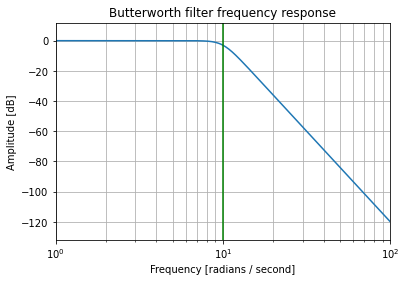

In [7]:
######################### Variaveis ##########################
N = 6 # ordem do filtro
cutoff_fs = 5 # frequencia de corte do filtro
ganhoDB = 0 # ganho em db
############################################################
T = 2*cutoff_fs # Taxa de amostragem
z = np.array([]) # não tem zeros
m = np.arange(-N+1, N, 2) # onde vao ficar localizados os polos
# Middle value is 0 to ensure an exactly real pole
p = -np.exp(1j * np.pi * m / (2 * N)) # os polos de fato
k = 10 ** (ganhoDB/20)
z, p, k = signal.lp2lp_zpk(z, p, k, wo=T) # desloca a frequência de corte do filtro passa baixa
w, h = signal.freqs_zpk(z, p, k)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(T, color='green') # cutoff frequency
plt.show()

Continuando, temos um filtro sample and hold, que pode ser composto por uma multiplicação do sinal de entrada por um trem de impulsos espaçados no periodo de amostragem, e logo após um retentor de ordem zero, que seria um filtro idealmente representado por uma resposta ao impulso de porta de altura 1 e largura T, onde a saída fica no formato de escada.

<img src="sample-and-hold.png"/>

Abaixo mostramos graficamente o que seria, simulamos uma amostra de seno, mantemos o valor a cada N amostras, e depois passamos em um filtro que representaria um retentor de ordem 0.

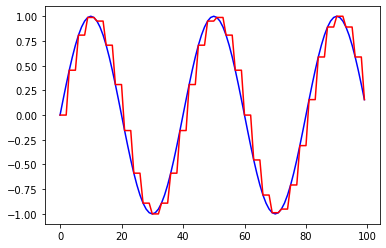

In [49]:
x = np.arange(0, 100, 1)
y = np.sin(x * np.pi / 20)
plt.plot(x, y, 'b')
for idx, val in enumerate(y):
    if (idx % 3 == 0):
        y[idx] = val
    else:
        y[idx] = 0
ht = np.array([1, 1, 1])
res = signal.convolve(y, ht)

plt.plot(x, res[0:100], 'r')
plt.show()

O terceiro bloco, que é onde fica o quantizador do sistema, é onde atribuimos o valor contínuo para uma variável em código, em geral existem duas abordagens, aproximar o valor para uma representação em código mais próxima, ou truncar o valor. \
Aproximar o valor gera uma função de densidade de probabilidade de erro com média 0, mas é mais difícil de se implementar na prática, enquanto o truncamento gera uma função de densidade de probabilidade de erro com média maior que zero. \
Abaixo temos uma simulação de truncamento e arrendodamento de um sinal senoidal e o exemplos de erro de quantização de um arrendodamento e de truncamento. \
Podemos ver a uniformidade do erro de arrendodamento em relação ao erro de truncamento.

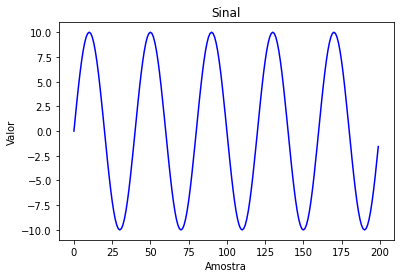

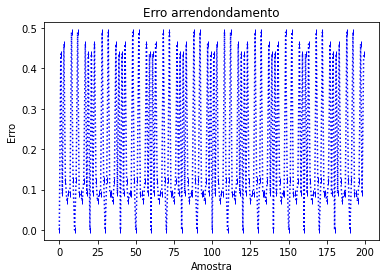

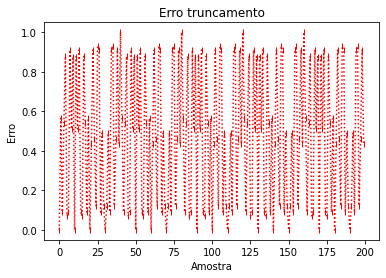

In [83]:
x = np.arange(0, 200, 1)
y = 10* np.sin(x * np.pi / 20)
yround = np.around(y)
yfloor = np.floor(y)
plt.plot(x, y, 'b')
plt.title('Sinal')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.show()
plt.title('Erro arrendondamento')
plt.xlabel('Amostra')
plt.ylabel('Erro')
plt.plot(x, abs(y-yround), '|b:')
plt.show()
plt.plot(x, abs(y-yfloor), '|r:')
plt.title('Erro truncamento')
plt.xlabel('Amostra')
plt.ylabel('Erro')
plt.show()

Sistema de tempo discreto - a definir

Conversor D/A - converter em trem de impulsos

Filtro de reconstrução compensado - passa baixa ideal